In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
from scipy.signal import bessel, sosfiltfilt

import transport_signal_processing as tsp

In [2]:
# data filepath
filepaths = glob("raw_data_extra/*.abf")
filepath = filepaths[0]
print(filepath)

raw_data_extra/DA_oligomer_900pM_1_CH001_000.abf


In [3]:
# load signal
V_l, I_l, dt = tsp.utils.read_abf(filepath)
I = I_l[0][:,0]
t = np.arange(I.shape[0]) * dt

/home/lfkrapp/anaconda3/envs/tsp/lib/python3.9/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'
Units "Input" can not be converted to a quantity. Using dimensionless instead
Units "Input" can not be converted to a quantity. Using dimensionless instead


2


In [4]:
def steps_detection(I, ws=9, n_iters=256):
    # envelope iterative smoothing
    Is = I.copy()
    for k in tqdm(range(n_iters)):
        Imax, Imin = tsp.signals.envelope(Is, ws)
        Is = 0.5*(Imax + Imin)

    # steps location
    ids_step = np.where(np.abs(np.diff(np.sign(np.diff(Is)))) > 0.5)[0]

    # steps amplitudes
    dI = np.abs(np.diff(Is[ids_step]))
    
    return Is, ids_step, dI

In [5]:
# steps detection
Is, ids_step, dI = steps_detection(I, ws=9, n_iters=256)

100%|██████████| 256/256 [00:16<00:00, 15.85it/s]


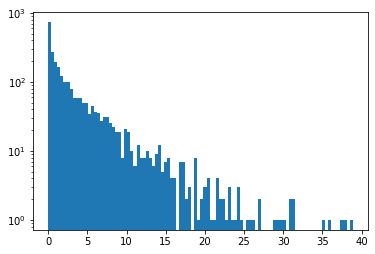

In [6]:
# plot
plt.figure()
plt.hist(dI, bins=100, log=True)
plt.show()

dI_thr = 17.77038


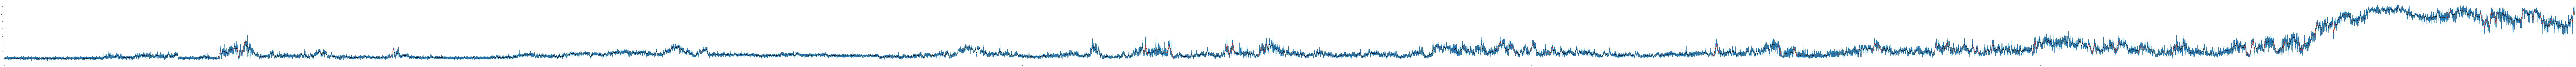

In [7]:
# parameters
dI_thr = np.mean(dI) + 3.0 * np.std(dI)
print("dI_thr = {:.5f}".format(dI_thr))

# selected steps
ids_sel = np.where(np.abs(dI) > dI_thr)[0]

# plot
plt.figure(figsize=(360,9))
plt.plot(t, I)
plt.plot(t, Is, '-')
plt.plot(t[ids_step], Is[ids_step], 'k.-')
for i in ids_sel:
    t_steps = t[ids_step]
    I_steps = Is[ids_step]
    plt.plot([t_steps[i],t_steps[i+1]], [I_steps[i], I_steps[i+1]], 'rd-')
    
#plt.plot(0.5*(t[ids_step][1:]+t[ids_step][:-1]), dI)

plt.xlim(t[0], t[-1])
plt.show()